 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"></ul></div>

In [32]:
Sys.setenv(LANG = "en")


In [33]:
# install.packages('Seurat')
library(Seurat)

In [34]:
library(dplyr)
library(Matrix)


In [35]:
# Load the PBMC dataset
pbmc.data <- Read10X(data.dir = "~/Downloads/filtered_gene_bc_matrices/hg19/")

# Examine the memory savings between regular and sparse matrices
dense.size <- object.size(x = as.matrix(x = pbmc.data))
dense.size

709264728 bytes

In [48]:
matrix_pbmc <- as.matrix(pbmc.data)

In [51]:
head(matrix_pbmc)

,AAACATACAACCAC,AAACATTGAGCTAC,AAACATTGATCAGC,AAACCGTGCTTCCG,AAACCGTGTATGCG,AAACGCACTGGTAC,AAACGCTGACCAGT,AAACGCTGGTTCTT,AAACGCTGTAGCCA,AAACGCTGTTTCTG,⋯,TTTCAGTGTCACGA,TTTCAGTGTCTATC,TTTCAGTGTGCAGT,TTTCCAGAGGTGAG,TTTCGAACACCTGA,TTTCGAACTCTCAT,TTTCTACTGAGGCA,TTTCTACTTCCTCG,TTTGCATGAGAGGC,TTTGCATGCCTCAC
MIR1302-10,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
RP11-34P13.7,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
RP11-34P13.8,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AL627309.1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [52]:
write.table(matrix_pbmc,"matrix_pbmc.txt",sep="\t",row.names=TRUE)


In [46]:
dim(pbmc.data)

[1] 32738  2700

In [5]:
pbmc.data

   [[ suppressing 32 column names ‘AAACATACAACCAC’, ‘AAACATTGAGCTAC’, ‘AAACATTGATCAGC’ ... ]]
   [[ suppressing 32 column names ‘AAACATACAACCAC’, ‘AAACATTGAGCTAC’, ‘AAACATTGATCAGC’ ... ]]
   [[ suppressing 32 column names ‘AAACATACAACCAC’, ‘AAACATTGAGCTAC’, ‘AAACATTGATCAGC’ ... ]]


32738 x 2700 sparse Matrix of class "dgTMatrix"
                                                                                            
MIR1302-10        .  .  .  . .  .  .  .  . .  .  .  .  . .  .  .  .  .  .  . .  . .  .  .  .
FAM138A           .  .  .  . .  .  .  .  . .  .  .  .  . .  .  .  .  .  .  . .  . .  .  .  .
OR4F5             .  .  .  . .  .  .  .  . .  .  .  .  . .  .  .  .  .  .  . .  . .  .  .  .
RP11-34P13.7      .  .  .  . .  .  .  .  . .  .  .  .  . .  .  .  .  .  .  . .  . .  .  .  .
RP11-34P13.8      .  .  .  . .  .  .  .  . .  .  .  .  . .  .  .  .  .  .  . .  . .  .  .  .
AL627309.1        .  .  .  . .  .  .  .  . .  .  .  .  . .  .  .  .  .  .  . .  . .  .  .  .
RP11-34P13.14     .  .  .  . .  .  .  .  . .  .  .  .  . .  .  .  .  .  .  . .  . .  .  .  .
RP11-34P13.9      .  .  .  . .  .  .  .  . .  .  .  .  . .  .  .  .  .  .  . .  . .  .  .  .
AP006222.2        .  .  .  . .  .  .  .  . .  .  .  .  . .  .  .  .  .  .  . .  . .  .  .  .
RP4-669L17.10     .  .

In [39]:
sparse.size <- object.size(x = pbmc.data)
sparse.size

38715120 bytes

In [40]:
dense.size/sparse.size


18.3 bytes

In [41]:
# Initialize the Seurat object with the raw (non-normalized data).  Keep all
# genes expressed in >= 3 cells (~0.1% of the data). Keep all cells with at
# least 200 detected genes
pbmc <- CreateSeuratObject(raw.data = pbmc.data, min.cells = 3, min.genes = 200, 
    project = "10X_PBMC")

In [43]:
pbmc_small <- FindVariableGenes(object = pbmc, do.plot = FALSE)
pbmc_small

An object of class seurat in project 10X_PBMC 
 13714 genes across 2700 samples.

In [47]:
pbmc_small@var.genes

[1] "NOC2L"           "TNFRSF4"         "AURKAIP1"        "RPL22"          
  [5] "CAMTA1"          "PGD"             "SZRD1"           "NECAP2"         
  [9] "CAMK2N1"         "PINK1"           "DDOST"           "MDS2"           
 [13] "LYPLA2"          "RP11-70P17.1"    "RPA2"            "SNHG12"         
 [17] "LCK"             "PSMB2"           "AGO4"            "MACF1"          
 [21] "C1orf50"         "CCDC23"          "AKR1A1"          "TMEM69"         
 [25] "MKNK1"           "ATPAF1"          "BTF3L4"          "ZCCHC11"        
 [29] "MAGOH"           "ATG4C"           "CTBS"            "PKN2"           
 [33] "LRRC8C"          "FAM212B"         "LIX1L"           "CD160"          
 [37] "APH1A"           "C1orf43"         "PBXIP1"          "CKS1B"          
 [41] "SLC50A1"         "FDPS"            "RIT1"            "LMNA"           
 [45] "CCT3"            "MEF2D"           "LY9"             "TSTD1"          
 [49] "NIT1"            "UFC1"            "RCSD1"           "PRRC2C"         
 [53] "PRDX6"           "TPR"             "RGS18"           "RABIF"          
 [57] "ADIPOR1"         "BTG2"            "IL24"            "H3F3A"          
 [61] "RP5-827C21.4"    "HNRNPU"          "YWHAQ"           "RRM2"           
 [65] "PDIA6"           "SF3B14"          "PTRHD1"          "DNMT3A"         
 [69] "GALM"            "MCFD2"           "REL"             "MDH1"           
 [73] "PELI1"           "PNO1"            "TPRKB"           "SUCLG1"         
 [77] "CAPG"            "MAT2A"           "RMND5A"          "CD8B"           
 [81] "LINC00152"       "SNRNP200"        "RNF149"          "TGFBRAP1"       
 [85] "LIMS1"           "TMEM177"         "GYPC"            "WDR33"          
 [89] "IMP4"            "PTPN18"          "PLEKHB2"         "DARS"           
 [93] "ARL5A"           "MARCH7"          "METTL8"          "MLTK"           
 [97] "SLC40A1"         "ANKAR"           "RP11-347P5.1"    "TYW5"           
[101] "ICOS"            "AAMP"            "ANKZF1"          "STK11IP"        
[105] "SP110"           "ITM2C"           "ARL4C"           "GPR35"          
[109] "HDLBP"           "DTYMK"           "SETD5"           "RPUSD3"         
[113] "JAGN1"           "ATG7"            "NUP210"          "LSM3"           
[117] "CCDC174"         "OXNAD1"          "SATB1"           "SLC4A7"         
[121] "CMTM6"           "MYD88"           "SLC25A38"        "NDUFAF3"        
[125] "QRICH1"          "USP19"           "IP6K1"           "FAM212A"        
[129] "RASSF1"          "TEX264"          "PRKCD"           "SELK"           
[133] "DENND6A"         "EOGT"            "C3orf38"         "MINA"           
[137] "TBC1D23"         "B4GALT4"         "GOLGB1"          "EAF2"           
[141] "CSTA"            "ZNF148"          "HMCES"           "H1FX"           
[145] "MBD4"            "MRPL3"           "PLSCR1"          "COMMD2"         
[149] "MFSD1"           "SEC62"           "KLHL6"           "RPL39L"         
[153] "IL1RAP"          "ACAP2"           "PCYT1A"          "ATP5I"          
[157] "ZFYVE28"         "MRFAP1"          "AC093323.3"      "ANAPC4"         
[161] "PGM2"            "ATP10D"          "TXK"             "OCIAD2"         
[165] "GRSF1"           "DNAJB14"         "BANK1"           "MANBA"          
[169] "PLA2G12A"        "CCNA2"           "MGST2"           "LRBA"           
[173] "RP11-701P16.5"   "BRD9"            "MED10"           "MARCH6"         
[177] "ZNF622"          "PTGER4"          "ZNF131"          "NDUFS4"         
[181] "GPBP1"           "ANKRA2"          "VCAN"            "COMMD10"        
[185] "ZCCHC10"         "KDM3B"           "PFDN1"           "CD14"           
[189] "YIPF5"           "SPARC"           "ATOX1"           "LARP1"          
[193] "HAVCR2"          "PTTG1"           "RARS"            "LCP2"           
[197] "GRK6"            "PHYKPL"          "SCGB3A1"         "RP11-532F6.3"   
[201] "ECI2"            "GMPR"            "HIST1H2BJ"       "RP1-313I6.12"   
[205] "PPP1R11"         

In [45]:
length(pbmc_small@var.genes)


[1] 646

In [9]:
length(pbmc@cell.names)

[1] 2700

In [10]:
length(unique(pbmc@cell.names))

[1] 2700

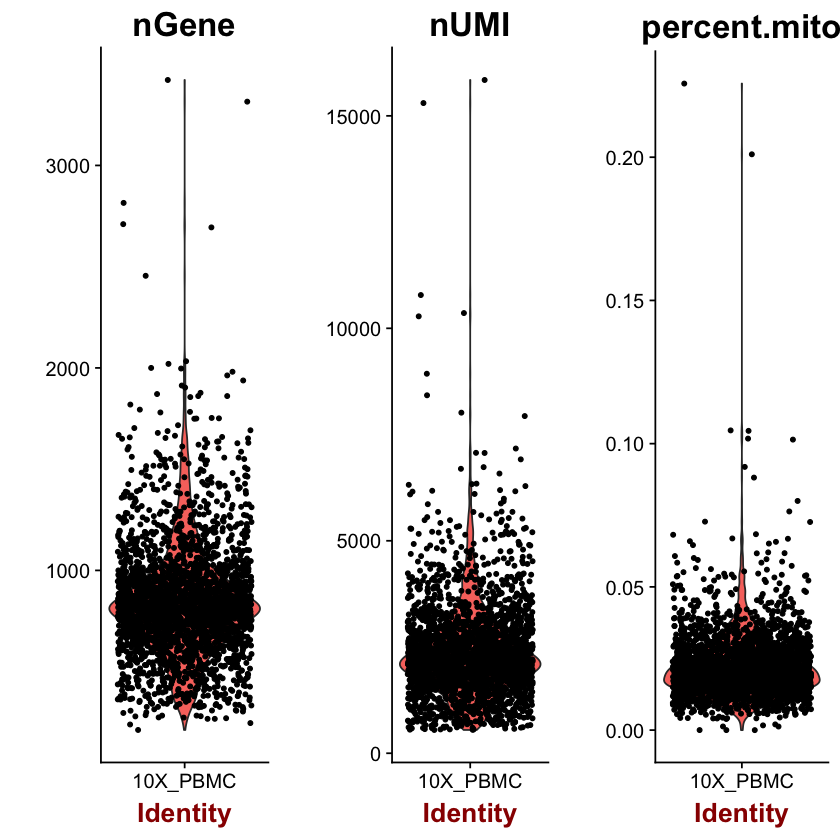

In [11]:
# The number of genes and UMIs (nGene and nUMI) are automatically calculated
# for every object by Seurat.  For non-UMI data, nUMI represents the sum of
# the non-normalized values within a cell We calculate the percentage of
# mitochondrial genes here and store it in percent.mito using AddMetaData.
# We use object@raw.data since this represents non-transformed and
# non-log-normalized counts The % of UMI mapping to MT-genes is a common
# scRNA-seq QC metric.  NOTE: You must have the Matrix package loaded to
# calculate the percent.mito values.
mito.genes <- grep(pattern = "^MT-", x = rownames(x = pbmc@data), value = TRUE)
percent.mito <- Matrix::colSums(pbmc@raw.data[mito.genes, ])/Matrix::colSums(pbmc@raw.data)

# AddMetaData adds columns to object@meta.data, and is a great place to
# stash QC stats
pbmc <- AddMetaData(object = pbmc, metadata = percent.mito, col.name = "percent.mito")
VlnPlot(object = pbmc, features.plot = c("nGene", "nUMI", "percent.mito"), nCol = 3)

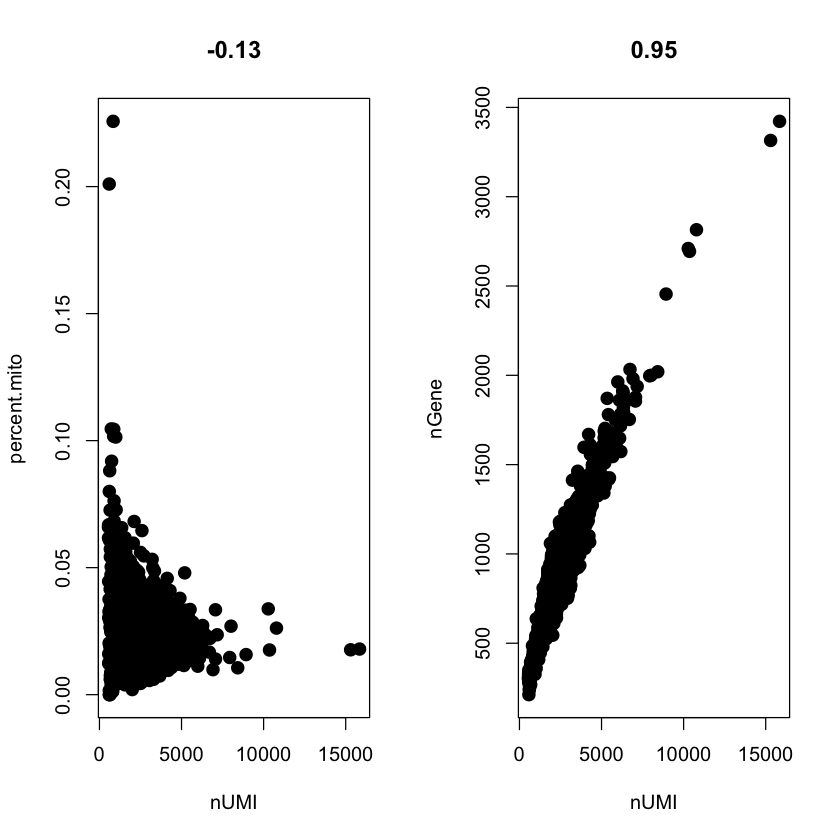

In [12]:
# GenePlot is typically used to visualize gene-gene relationships, but can
# be used for anything calculated by the object, i.e. columns in
# object@meta.data, PC scores etc.  Since there is a rare subset of cells
# with an outlier level of high mitochondrial percentage and also low UMI
# content, we filter these as well
par(mfrow = c(1, 2))
GenePlot(object = pbmc, gene1 = "nUMI", gene2 = "percent.mito")
GenePlot(object = pbmc, gene1 = "nUMI", gene2 = "nGene")


In [13]:
# We filter out cells that have unique gene counts over 2,500 or less than
# 200 Note that low.thresholds and high.thresholds are used to define a
# 'gate' -Inf and Inf should be used if you don't want a lower or upper
# threshold.
pbmc <- FilterCells(object = pbmc, subset.names = c("nGene", "percent.mito"), 
    low.thresholds = c(200, -Inf), high.thresholds = c(2500, 0.05))


In [14]:
pbmc <- NormalizeData(object = pbmc, normalization.method = "LogNormalize", 
    scale.factor = 10000)

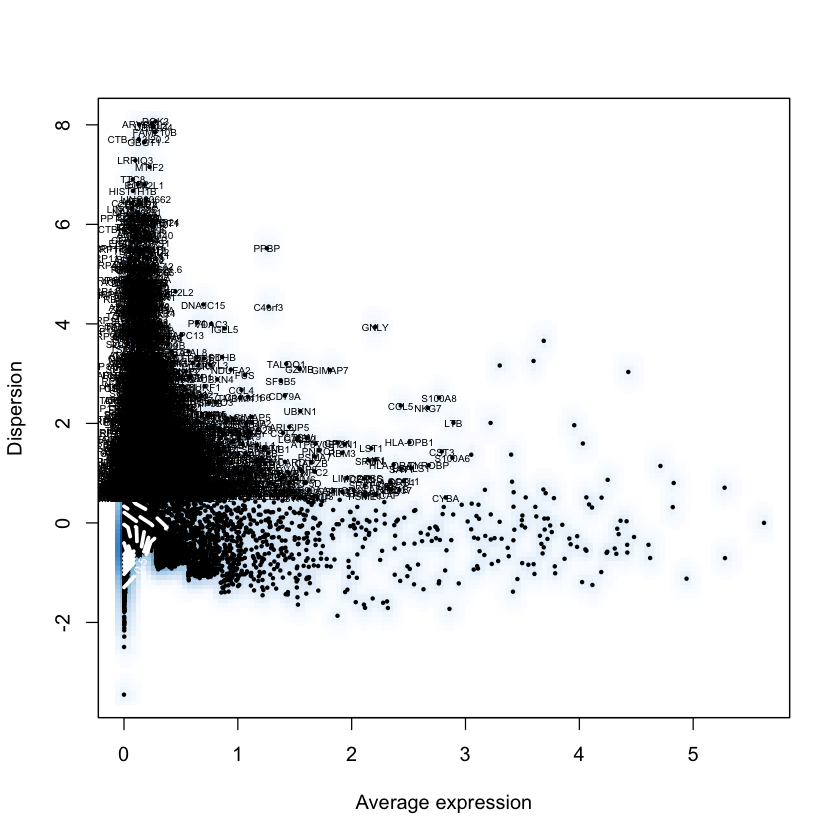

In [15]:
pbmc <- FindVariableGenes(object = pbmc, mean.function = ExpMean, dispersion.function = LogVMR, 
    x.low.cutoff = 0.0125, x.high.cutoff = 3, y.cutoff = 0.5)

In [16]:
length(x = pbmc@var.genes)

[1] 1838

In [17]:
pbmc <- ScaleData(object = pbmc, vars.to.regress = c("nUMI", "percent.mito"))

[1] "Regressing out nUMI"         "Regressing out percent.mito"
  |======================================================================| 100%
[1] "Scaling data matrix"
  |======================================================================| 100%


In [18]:
pbmc <- RunPCA(object = pbmc, pc.genes = pbmc@var.genes, do.print = TRUE, pcs.print = 1:5, 
    genes.print = 5)

[1] "PC1"
[1] "CST3"   "TYROBP" "FCN1"   "LST1"   "AIF1"  
[1] ""
[1] "PTPRCAP" "IL32"    "LTB"     "CD2"     "CTSW"   
[1] ""
[1] ""
[1] "PC2"
[1] "CD79A"    "MS4A1"    "HLA-DQA1" "TCL1A"    "HLA-DQB1"
[1] ""
[1] "NKG7" "GZMB" "PRF1" "CST7" "GZMA"
[1] ""
[1] ""
[1] "PC3"
[1] "PF4"   "PPBP"  "SDPR"  "SPARC" "GNG11"
[1] ""
[1] "CYBA"     "HLA-DPA1" "HLA-DPB1" "HLA-DRB1" "CD37"    
[1] ""
[1] ""
[1] "PC4"
[1] "IL32"   "GIMAP7" "AQP3"   "FYB"    "MAL"   
[1] ""
[1] "CD79A"    "HLA-DQA1" "CD79B"    "MS4A1"    "HLA-DQB1"
[1] ""
[1] ""
[1] "PC5"
[1] "FCER1A"  "LGALS2"  "MS4A6A"  "S100A8"  "CLEC10A"
[1] ""
[1] "FCGR3A"        "CTD-2006K23.1" "IFITM3"        "ABI3"         
[5] "CEBPB"        
[1] ""
[1] ""


In [19]:
# Examine and visualize PCA results a few different ways
PrintPCA(object = pbmc, pcs.print = 1:5, genes.print = 5, use.full = FALSE)

[1] "PC1"
[1] "CST3"   "TYROBP" "FCN1"   "LST1"   "AIF1"  
[1] ""
[1] "PTPRCAP" "IL32"    "LTB"     "CD2"     "CTSW"   
[1] ""
[1] ""
[1] "PC2"
[1] "CD79A"    "MS4A1"    "HLA-DQA1" "TCL1A"    "HLA-DQB1"
[1] ""
[1] "NKG7" "GZMB" "PRF1" "CST7" "GZMA"
[1] ""
[1] ""
[1] "PC3"
[1] "PF4"   "PPBP"  "SDPR"  "SPARC" "GNG11"
[1] ""
[1] "CYBA"     "HLA-DPA1" "HLA-DPB1" "HLA-DRB1" "CD37"    
[1] ""
[1] ""
[1] "PC4"
[1] "IL32"   "GIMAP7" "AQP3"   "FYB"    "MAL"   
[1] ""
[1] "CD79A"    "HLA-DQA1" "CD79B"    "MS4A1"    "HLA-DQB1"
[1] ""
[1] ""
[1] "PC5"
[1] "FCER1A"  "LGALS2"  "MS4A6A"  "S100A8"  "CLEC10A"
[1] ""
[1] "FCGR3A"        "CTD-2006K23.1" "IFITM3"        "ABI3"         
[5] "CEBPB"        
[1] ""
[1] ""


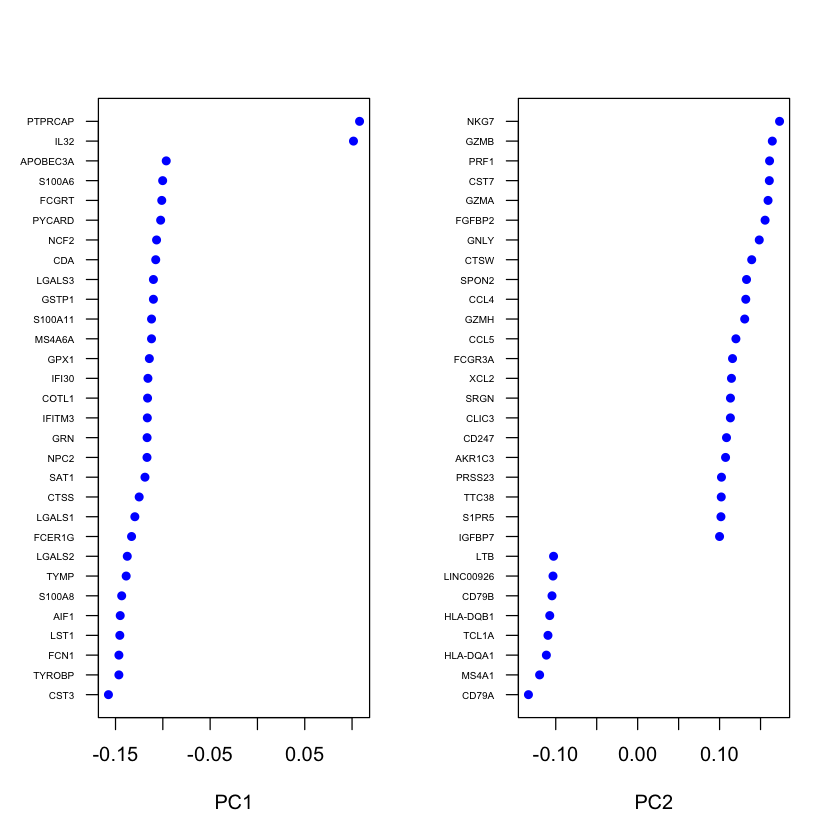

In [20]:
VizPCA(object = pbmc, pcs.use = 1:2)


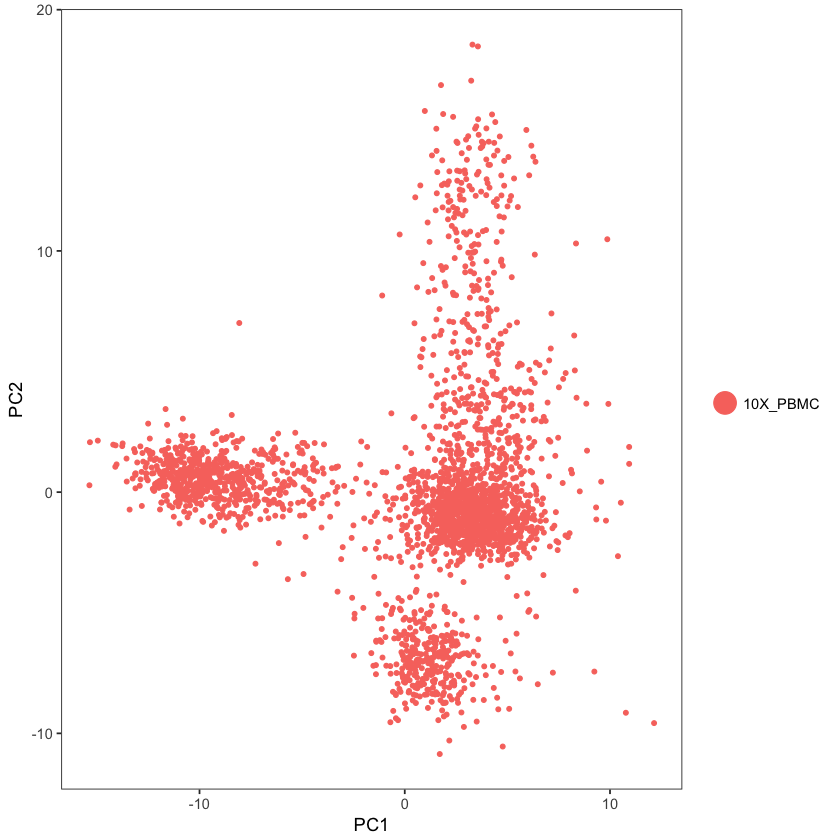

In [21]:
PCAPlot(object = pbmc, dim.1 = 1, dim.2 = 2)


In [22]:
# ProjectPCA scores each gene in the dataset (including genes not included
# in the PCA) based on their correlation with the calculated components.
# Though we don't use this further here, it can be used to identify markers
# that are strongly correlated with cellular heterogeneity, but may not have
# passed through variable gene selection.  The results of the projected PCA
# can be explored by setting use.full=T in the functions above
pbmc <- ProjectPCA(object = pbmc, do.print = FALSE)

Warning message in heatmap.2(data.use, Rowv = NA, Colv = NA, trace = "none", col = col.use, :
“Discrepancy: Rowv is FALSE, while dendrogram is `both'. Omitting row dendogram.”Warning message in heatmap.2(data.use, Rowv = NA, Colv = NA, trace = "none", col = col.use, :
“Discrepancy: Colv is FALSE, while dendrogram is `column'. Omitting column dendogram.”Warning message in plot.window(...):
“"dimTitle" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"dimTitle" is not a graphical parameter”Warning message in title(...):
“"dimTitle" is not a graphical parameter”

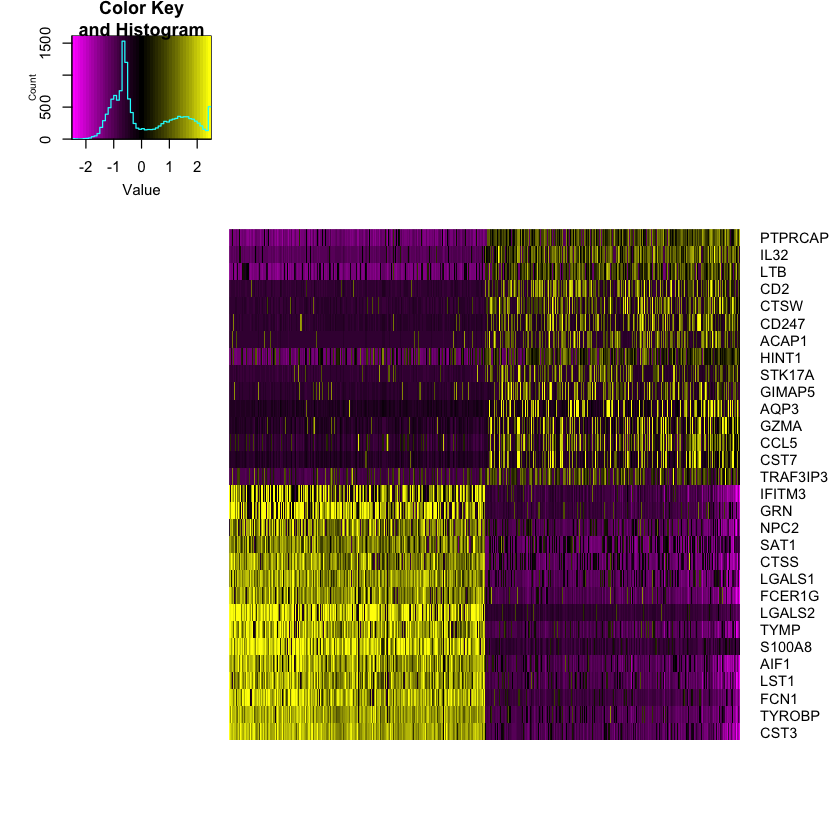

In [23]:
PCHeatmap(object = pbmc, pc.use = 1, cells.use = 500, do.balanced = TRUE, label.columns = FALSE)


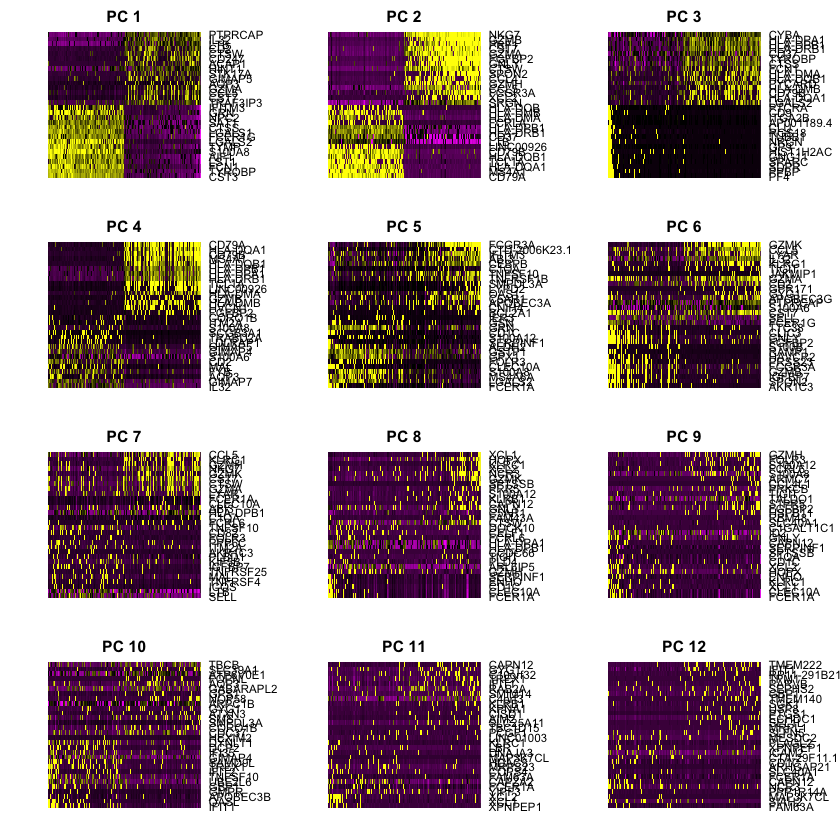

In [24]:
PCHeatmap(object = pbmc, pc.use = 1:12, cells.use = 500, do.balanced = TRUE, 
    label.columns = FALSE, use.full = FALSE)

In [25]:
# NOTE: This process can take a long time for big datasets, comment out for
# expediency.  More approximate techniques such as those implemented in
# PCElbowPlot() can be used to reduce computation time
pbmc <- JackStraw(object = pbmc, num.replicate = 100, do.print = FALSE)

Warning message:
“Removed 17469 rows containing missing values (geom_point).”

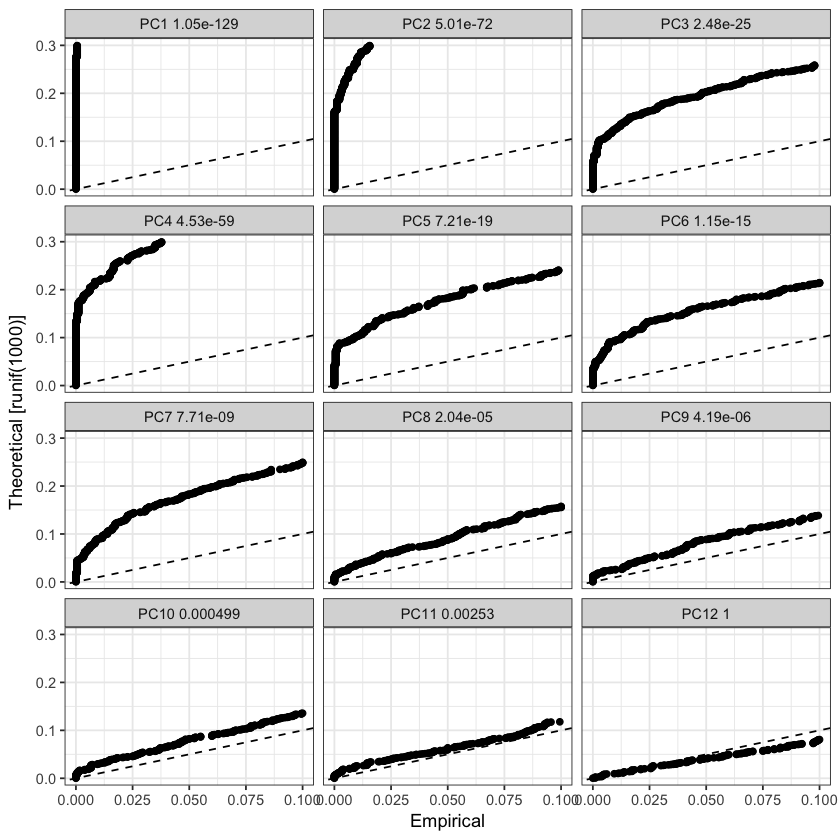

In [26]:
JackStrawPlot(object = pbmc, PCs = 1:12)


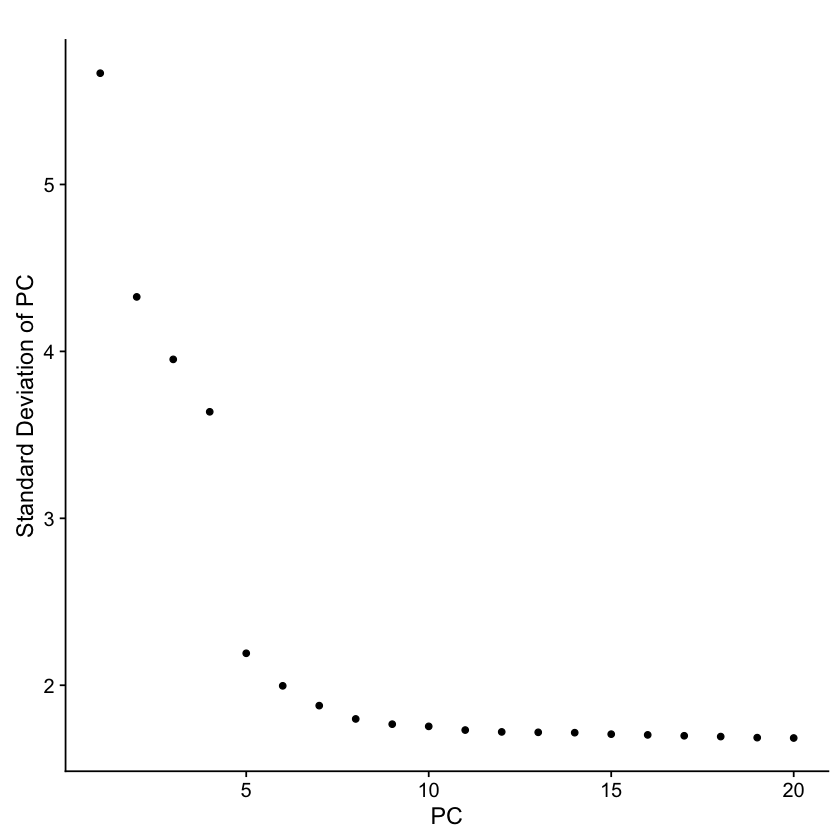

In [27]:
PCElbowPlot(object = pbmc)


In [28]:
# save.SNN = T saves the SNN so that the clustering algorithm can be rerun
# using the same graph but with a different resolution value (see docs for
# full details)
pbmc <- FindClusters(object = pbmc, reduction.type = "pca", dims.use = 1:10, 
    resolution = 0.6, print.output = 0, save.SNN = TRUE)

In [29]:
PrintFindClustersParams(object = pbmc)


Parameters used in latest FindClusters calculation run on: 2018-05-19 12:03:40
Resolution: 0.6
-----------------------------------------------------------------------------
Modularity Function    Algorithm         n.start         n.iter
     1                   1                 100             10
-----------------------------------------------------------------------------
Reduction used          k.param          k.scale          prune.SNN
     pca                 30                25              0.0667
-----------------------------------------------------------------------------
Dims used in calculation
1 2 3 4 5 6 7 8 9 10



In [30]:
pbmc <- RunTSNE(object = pbmc, dims.use = 1:10, do.fast = TRUE)


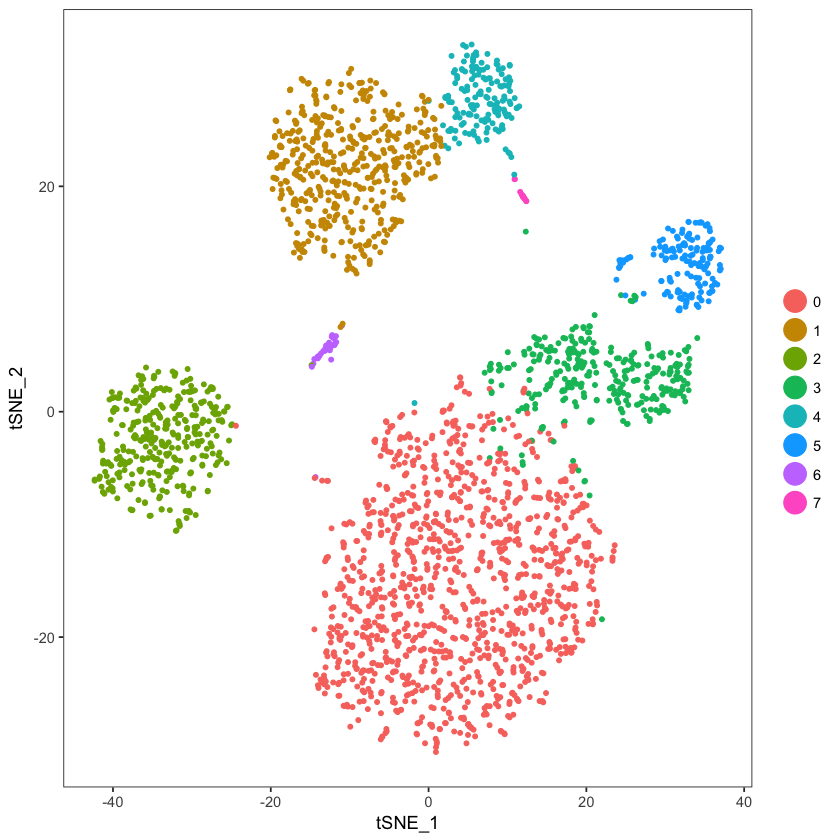

In [31]:
TSNEPlot(object = pbmc)


In [45]:
save(pbmc, file = "/Users/dariapodorskaja/pbmc_tutorial.Robj")


In [47]:
pbmc

An object of class seurat in project 10X_PBMC 
 13714 genes across 2638 samples.

In [48]:
to.read = file("/Users/dariapodorskaja/pbmc_tutorial.Robj", "rb")


In [49]:
readBin(to.read, integer(), endian = "little")


[1] 559903

In [50]:
readBin(to.read, integer(), n = 4, endian = "little")

[1]           0 -1114373376  -447365003  -289540650

In [57]:
readBin(to.read, integer(), n = 5, size = 2, endian = "little")


[1] -32296   3193  28396 -10555  23663

In [52]:
newdata = file("/Users/dariapodorskaja/pbmc_tutorial.Robj", "rb")


In [54]:
newdata

A connection with                                                       
description "/Users/dariapodorskaja/pbmc_tutorial.Robj"
class       "file"                                     
mode        "rb"                                       
text        "binary"                                   
opened      "opened"                                   
can read    "yes"                                      
can write   "no"                                       

In [2]:
a=5

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: неожиданный SPECIAL
1: %%
    ^


In [12]:
for ( obj in ls() ) { print(get(obj)); print(object.size(obj)) }

[1] 5
96 bytes
[1] "obj"
96 bytes


In [15]:
ls()

[1] "a"   "obj"

In [23]:
pbmc <- RunTSNE(object = pbmc, dims.use = 1:10, do.fast = TRUE)

ERROR: Error in GetDimReduction(object = object, reduction.type = reduction.use, : pca  dimensional reduction has not been computed


In [24]:
pbmc <- RunPCA(object = pbmc, pc.genes = pbmc@var.genes, do.print = TRUE, pcs.print = 1:5, 
    genes.print = 5)

ERROR: Error in GetAssayData(object, assay.type = assay.type, slot = "scale.data"): Object@scale.data has not been set. Run ScaleData() and then retry.
